<a href="https://colab.research.google.com/github/Kenil-kavar/Lang-Chain/blob/main/LangChain_with_Gemini%20API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U google-generativeai

In [2]:
import pathlib
import textwrap

import google.generativeai as genai

#Used to security store your API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('*','*')
  return Markdown(textwrap.indent(text,'>',predicate=lambda _:True))

# **Setup API Key**

In [3]:
import os
os.environ['GOOGLE_API_KEY']="API_KEY"

In [4]:
genai.configure(api_key= os.environ['GOOGLE_API_KEY'])

In [5]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


**Now** let's generate text  from text input

In [15]:
model= genai.GenerativeModel('gemini-pro') ## Specific for text generation task

In [20]:
# generate_content  mmethod can handle a wide variety of use cases, inncluding multi-turn chat and multimodel input, depending on what the uderlying model support
%%time
response= model.generate_content("What is the meaning of life")


CPU times: user 114 ms, sys: 13.3 ms, total: 127 ms
Wall time: 9.06 s


In [21]:
model

genai.GenerativeModel(
    model_name='models/gemini-pro',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
)

In [22]:
to_markdown(response.text)

>The meaning of life is a philosophical question that has been pondered by humans for centuries. There is no one definitive answer, as the meaning of life is unique to each individual. However, here are some possible meanings of life:
>
>-To live in accordance with your values and beliefs.
>-To make a positive impact on the world.
>-To experience love, joy, and other positive emotions.
>-To learn and grow as a person.
>-To create something meaningful.
>-To find peace and happiness.
>
>Ultimately, the meaning of life is what you make it. There is no right or wrong answer. The important thing is to live a life that is true to yourself and that makes you happy.
>
>Here are some additional thoughts on the meaning of life:
>
>- The meaning of life is not something that you can find once and for all. It is an ongoing journey that you can explore throughout your life.
>- The meaning of life can change over time. As you grow and change, so too may your understanding of what makes life meaningful.
>- There is no one right way to live your life. The meaning of life is not something that you can achieve by following a set of rules. It is something that you discover by living your life in a way that is true to yourself.
>
>The meaning of life is a personal question, and there is no one right answer. However, by reflecting on the questions above, you can begin to explore what makes life meaningful to you.

In [24]:
response.prompt_feedback

In [25]:
response.candidates

[content {
  parts {
    text: "The meaning of life is a philosophical question that has been pondered by humans for centuries. There is no one definitive answer, as the meaning of life is unique to each individual. However, here are some possible meanings of life:\n\n-To live in accordance with your values and beliefs.\n-To make a positive impact on the world.\n-To experience love, joy, and other positive emotions.\n-To learn and grow as a person.\n-To create something meaningful.\n-To find peace and happiness.\n\nUltimately, the meaning of life is what you make it. There is no right or wrong answer. The important thing is to live a life that is true to yourself and that makes you happy.\n\nHere are some additional thoughts on the meaning of life:\n\n- The meaning of life is not something that you can find once and for all. It is an ongoing journey that you can explore throughout your life.\n- The meaning of life can change over time. As you grow and change, so too may your understand

In [26]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

The meaning of life is a philosophical question that has been pondered by humans for centuries. There is no one definitive answer, as the meaning of life is unique to each individual. However, here are some possible meanings of life:

-To live in accordance with your values and beliefs.
-To make a positive impact on the world.
-To experience love, joy, and other positive emotions.
-To learn and grow as a person.
-To create something meaningful.
-To find peace and happiness.

Ultimately, the meaning of life is what you make it. There is no right or wrong answer. The important thing is to live a life that is true to yourself and that makes you happy.

Here are some additional thoughts on the meaning of life:

- The meaning of life is not something that you can find once and for all. It is an ongoing journey that you can explore throughout your life.
- The meaning of life can change over time. As you grow and change, so too may your understanding of what makes life meaningful.
- There is 

In [30]:
response = model.generate_content("What is the meaning  of life", stream= True)

In [31]:
response.prompt_feedback

In [32]:
try:
  response.text
except Exception as e:
  print(f'{type(e).__name__}:{e}')

IncompleteIterationError:Please let the response complete iteration before accessing the final accumulated
attributes (or call `response.resolve()`)


Generate text from image and text input

In [34]:
import PIL.Image
img= PIL.Image.open('Babu_2 - Copy.jpeg')

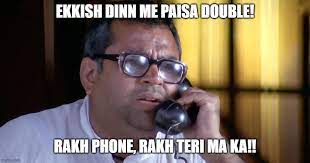

In [35]:
img

In [42]:
model  = genai.GenerativeModel('gemini-pro-vision')

In [43]:
response=model.generate_content(img)
to_markdown(response.text)

> Context: A man receives a call from a telemarketer.

In [48]:
response=model.generate_content(["write a short engaging blog post based on the picture.It should  include a descrription of the photo and text in photo ",img],stream=True)
response.resolve()

In [49]:
to_markdown(response.text)

> The photo shows a man with a surprised expression on his face. He is holding a phone to his ear and the text in the photo says "Phone rakho,rakhi teri maa ki".The text in the photo is a famous dialogue from the movie Hera Pheri.